In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import glob

### Setting Working Directories

In [2]:
data_dir = '/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/analyzed_data/output_files_may22'

In [3]:
input_dir = '/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng'

In [4]:
all_table=pd.DataFrame()
with open(os.path.join(input_dir,'plate_row_list.txt')) as file:
    for line in file:
        for r in ['Downstream', 'Upstream']:
            x = line.strip('\n').split(' ')
            x.append(r)
            fileName = '_'.join(x) + '.txt'
            print('reading file : {}'.format(fileName))
            if os.stat(os.path.join(data_dir,fileName)).st_size != 0:
                t = pd.read_csv((os.path.join(data_dir,fileName)), sep='\t', index_col=0)
                t['RBPmean-NEGmean'] = t['mean']-t.loc['NEG','mean']
                t['|RBPmean-NEGmean|'] = abs(t['RBPmean-NEGmean'])
                t['mean_normalized'] = t['mean']/t.loc['NEG','mean']
                if r=='Downstream':
                    t['reporter']='Downstream'#annotating whether it is upstream or downstream
                elif r=='Upstream':
                    t['reporter']='Upstream'#annotating whether it is upstream or downstream
                all_table=pd.concat([all_table, t])


reading file : GYRBP001_A_Downstream.txt
reading file : GYRBP001_A_Upstream.txt
reading file : GYRBP001_B_Downstream.txt
reading file : GYRBP001_B_Upstream.txt
reading file : GYRBP001_C_Downstream.txt
reading file : GYRBP001_C_Upstream.txt
reading file : GYRBP001_D_Downstream.txt
reading file : GYRBP001_D_Upstream.txt
reading file : GYRBP001_E_Downstream.txt
reading file : GYRBP001_E_Upstream.txt
reading file : GYRBP001_F_Downstream.txt
reading file : GYRBP001_F_Upstream.txt
reading file : GYRBP001_G_Downstream.txt
reading file : GYRBP001_G_Upstream.txt
reading file : GYRBP001_H_Downstream.txt
reading file : GYRBP001_H_Upstream.txt
reading file : GYRBP002_A_Downstream.txt
reading file : GYRBP002_A_Upstream.txt
reading file : GYRBP002_B_Downstream.txt
reading file : GYRBP002_B_Upstream.txt
reading file : GYRBP002_C_Downstream.txt
reading file : GYRBP002_C_Upstream.txt
reading file : GYRBP002_D_Downstream.txt
reading file : GYRBP002_D_Upstream.txt
reading file : GYRBP002_E_Downstream.txt

In [5]:
all_table = all_table.reset_index()

In [6]:
all_table.head(50)

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,|RBPmean-NEGmean|,mean_normalized,reporter
0,NEG,1.073910,1.316469,1.392488,1.260955,0.117653,NaN,NaN,controls,0.000000,0.000000,1.000000,Downstream
1,CPSF5,0.782044,0.950250,0.927488,0.886594,0.074510,0.039824,*,controls,-0.374361,0.374361,0.703113,Downstream
2,CPSF6,1.061556,1.101359,6.000000,2.720972,2.318680,0.467262,NaN,controls,1.460016,1.460016,2.157865,Downstream
3,HNRNPCL1,0.111297,0.119194,0.250000,0.160164,0.063606,0.002427,***,controls,-1.100792,1.100792,0.127018,Downstream
4,CPNE3,1.666667,0.907135,0.793279,1.122360,0.474808,0.672031,NaN,GYRBP001.A01,-0.138595,0.138595,0.890087,Downstream
5,SNRPG,2.266279,2.082801,1.901468,2.083516,0.182407,0.004593,***,GYRBP001.A02,0.822561,0.822561,1.652331,Downstream
6,SUMO1,1.541465,1.228903,1.625911,1.465426,0.209141,0.259040,NaN,GYRBP001.A03,0.204471,0.204471,1.162156,Downstream
7,FAM32A,0.545535,0.597955,0.488889,0.544126,0.054547,0.011225,*,GYRBP001.A04,-0.716829,0.716829,0.431519,Downstream
8,LSM1,2.961159,3.421189,3.220879,3.201076,0.230653,0.000494,***,GYRBP001.A05,1.940120,1.940120,2.538611,Downstream
9,HRSP12,2.022814,1.799644,2.099873,1.974110,0.155927,0.005697,**,GYRBP001.A06,0.713155,0.713155,1.565567,Downstream


## Removing missing wells

In [7]:
missing_wells = pd.read_csv(os.path.join(input_dir, 'manifest_final_missing_wells.tsv'), sep='\t', header=None)

In [8]:
missing_wells.head()

,0,1,2,3
0,GYRBP001 A,HTATSF1,A10,Down
1,GYRBP001 B,SNRPD2,B4,Up/Down
2,GYRBP001 B,RPL28,B6,Up/Down
3,GYRBP001 C,NOP10,C1,Down
4,GYRBP001 C,NANOS2,C6,Up/Down


In [9]:
missing_wells.shape

(88, 4)

In [10]:
#There are no missing wells all from a single row of a plate
#Double checking this because it requires different code
missing_wells[missing_wells[2]=='All']

,0,1,2,3


In [11]:
def format_well_id_and_categorize(df):
    if int(df[2][1:])<10:  #need this if statement to match how numbers <10 are represented in the MCP library file
        well = df[0].split(' ')[0] + '.' + df[2][0] + '0' + df[2][1:]
    else:   
        well = df[0].split(' ')[0] + '.' + df[2]
    if df[3]=='Down':
        missing['downstream'].append(well)
    elif df[3]=='Upstream':
        missing['upstream'].append(well)
    elif df[3]=='Up/Down':
        missing['upstream'].append(well)
        missing['downstream'].append(well)

missing = {'upstream':[], 'downstream': []}
missing_wells.apply(format_well_id_and_categorize, axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
83    None
84    None
85    None
86    None
87    None
Length: 88, dtype: object

In [12]:
#Checking that numbers <10 are formatted correctly
missing['upstream'][:5]

['GYRBP001.B04',
 'GYRBP001.B06',
 'GYRBP001.C06',
 'GYRBP001.C07',
 'GYRBP001.C11']

## Categorizing Upstream and Downstream Results

In [17]:
upstream_results = all_table[all_table['reporter']=='Upstream']

In [18]:
#removing all wells that are in the missing wells dictionary
upstream_results = upstream_results[~upstream_results['well_id'].isin(missing['upstream'])]

In [19]:
upstream_results.shape

(1229, 13)

In [20]:
upstream_results.head()

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,|RBPmean-NEGmean|,mean_normalized,reporter
16,NEG,0.708242,0.634997,0.814653,0.719297,0.063878,NaN,NaN,controls,0.000000,0.000000,1.000000,Upstream
17,CPSF5,7.995807,8.223180,9.084158,8.434382,0.468744,0.001477,***,controls,7.715085,7.715085,11.725863,Upstream
18,CPSF6,2.715237,3.115819,4.217557,3.349538,0.635196,0.026609,*,controls,2.630240,2.630240,4.656680,Upstream
19,HNRNPCL1,0.165337,0.213614,0.216191,0.198381,0.023389,0.005832,**,controls,-0.520917,0.520917,0.275798,Upstream
20,CPNE3,0.272727,0.499700,0.473919,0.415449,0.124271,0.030733,*,GYRBP001.A01,-0.303849,0.303849,0.577576,Upstream


In [21]:
downstream_results = all_table[all_table['reporter']=='Downstream']

In [22]:
#removing all wells that in the missing wells dictionary
downstream_results = downstream_results[~downstream_results['well_id'].isin(missing['downstream'])]

In [23]:
downstream_results.shape

(1225, 13)

In [24]:
downstream_results.head()

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,|RBPmean-NEGmean|,mean_normalized,reporter
0,NEG,1.073910,1.316469,1.392488,1.260955,0.117653,NaN,NaN,controls,0.000000,0.000000,1.000000,Downstream
1,CPSF5,0.782044,0.950250,0.927488,0.886594,0.074510,0.039824,*,controls,-0.374361,0.374361,0.703113,Downstream
2,CPSF6,1.061556,1.101359,6.000000,2.720972,2.318680,0.467262,NaN,controls,1.460016,1.460016,2.157865,Downstream
3,HNRNPCL1,0.111297,0.119194,0.250000,0.160164,0.063606,0.002427,***,controls,-1.100792,1.100792,0.127018,Downstream
4,CPNE3,1.666667,0.907135,0.793279,1.122360,0.474808,0.672031,NaN,GYRBP001.A01,-0.138595,0.138595,0.890087,Downstream


## Annotating Lists

In [25]:
MCP_list = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/Updated-RBP_V5_MCP.txt', sep='\t').set_index('Symbol')[['Plate Location', 'Gene ID', 'Size', 'Accession', 'nt_sequence', 'aa_sequence']]
Missing_Wells_MCP_list= pd.read_csv('/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/Missing_Wells_List.txt', sep='\t').set_index('Symbol')[['Plate Location', 'Gene ID', 'Size', 'Accession', 'nt_sequence', 'aa_sequence']]
Missing_Wells_MCP_list=Missing_Wells_MCP_list.dropna(subset=['Plate Location'])
MCP_list_all = pd.concat([MCP_list, Missing_Wells_MCP_list]).reset_index()


In [26]:
MCP_list_all.tail()

,Symbol,Plate Location,Gene ID,Size,Accession,nt_sequence,aa_sequence
1036,DDX41,Missing_Wells.B10,51428.0,1869.0,BC015476.1,ATGGAGGAGTCGGAACCCGAACGGAAGCGGGCTCGCACCGACGAGG...,MEESEPERKRARTDEVPAGGSRSEAEDEDDEDYVPYVPLRQRRQLL...
1037,BCDIN3D,Missing_Wells.A11,144233.0,879.0,BC053560.1,ATGGCGGTGCCCACGGAACTGGATGGAGGGAGTGTTAAGGAGACCG...,MAVPTELDGGSVKETAAEEESRVLAPGAAPFGNFPHYSRFHPPEQR...
1038,RPS10,Missing_Wells.B11,6204.0,498.0,"BC001032.2, BC001955.1, BC005012.1",ATGTTGATGCCTAAGAAGAACCGGATTGCCATTTATGAACTCCTTT...,MLMPKKNRIAIYELLFKEGVMVAKKDVHMPKHPELADKNVPNLHVM...
1039,RPLP0,Missing_Wells.A12,6175.0,954.0,"BC000087.2, BC008092.1, BC008594.1, BC009867.2...",ATGCCCAGGGAAGACAGGGCGACCTGGAAGTCCAACTACTTCCTTA...,MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMS...
1040,LGALS1,Missing_Wells.B12,3956.0,408.0,"BC001693.1, BC020675.1",ATGGCTTGTGGTCTGGTCGCCAGCAACCTGAATCTCAAACCTGGAG...,MACGLVASNLNLKPGECLRVRGEVAPDAKSFVLNLGKDSNNLCLHF...


In [27]:
annotated_upstream_results = pd.merge(upstream_results, MCP_list_all, left_on='well_id', right_on='Plate Location').dropna(subset=['reporter']).dropna(subset=['Plate Location'])

In [28]:
annotated_upstream_results.shape

(901, 20)

In [29]:
annotated_downstream_results = pd.merge(downstream_results, MCP_list_all, left_on='well_id', right_on='Plate Location').dropna(subset=['reporter']).dropna(subset=['Plate Location'])

In [30]:
annotated_downstream_results.shape

(897, 20)

## Remove wells that are repeats from the missing wells plates

In [31]:
m = pd.read_csv('/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/Missing_Wells_List.txt', sep='\t').dropna(subset=['Plate Location'])

In [32]:
missing_wells_duplicates = pd.merge(m,MCP_list.reset_index(),on='aa_sequence', how='inner')[['Plate Location_x', 'Symbol_x', 'Plate Location_y','Symbol_y']].drop_duplicates(subset=['Plate Location_x'])['Plate Location_y'].tolist()

In [34]:
annotated_upstream_results = annotated_upstream_results[~annotated_upstream_results['well_id'].isin(missing_wells_duplicates)]

In [36]:
annotated_downstream_results = annotated_downstream_results[~annotated_downstream_results['well_id'].isin(missing_wells_duplicates)]

## Categorize as positive or negative effect

In [39]:
def assign_positive_or_negative(df):
    if (df['RBPmean-NEGmean'] <0) and (df['pvalue']<0.05):
        return 'negative'
    elif (df['RBPmean-NEGmean'] >0) and (df['pvalue']<0.05):
        return 'positive'
    else:
        return 'neither'

In [40]:
annotated_upstream_results['Effect'] = annotated_upstream_results.apply(assign_positive_or_negative, axis=1)

In [41]:
annotated_upstream_results.head()

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,...,mean_normalized,reporter,Symbol,Plate Location,Gene ID,Size,Accession,nt_sequence,aa_sequence,Effect
0,CPNE3,0.272727,0.499700,0.473919,0.415449,0.124271,0.030733,*,GYRBP001.A01,-0.303849,...,0.577576,Upstream,CPNE3,GYRBP001.A01,8895.0,135.0,BC015734.1,ATGCTTGGAAACAGCATAGATATGTTGCTGTGGTTTTCAGAATTTT...,MLGNSIDMLLWFSEFSLLITRSLLKNDLHIFSCTVKQTEVSLSV,negative
1,SNRPG,0.297710,0.418187,0.474384,0.396760,0.090265,0.011926,*,GYRBP001.A02,-0.322537,...,0.551594,Upstream,SNRPG,GYRBP001.A02,6637.0,231.0,"BC000070.2, BC022432.1, BC066302.1",ATGAGCAAAGCTCACCCTCCCGAGTTGAAAAAATTTATGGACAAGA...,MSKAHPPELKKFMDKKLSLKLNGGRHVQGILRGFDPFMNLVIDECV...,negative
2,SUMO1,0.546217,0.642401,0.639564,0.609394,0.054731,0.161038,NaN,GYRBP001.A03,-0.109903,...,0.847207,Upstream,SUMO1,GYRBP001.A03,7341.0,306.0,"BC006462.1, BC053528.1",ATGTCTGACCAGGAGGCAAAACCTTCAACTGAGGACTTGGGGGATA...,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...,neither
3,FAM32A,0.564965,0.699513,0.554290,0.606256,0.080939,0.182626,NaN,GYRBP001.A04,-0.113041,...,0.842845,Upstream,FAM32A,GYRBP001.A04,26017.0,339.0,"BC000639.1, BC017286.1",ATGGAGGCCTACGAGCAGGTCCAAAAGGGACCCCTGAAGCTGAAAG...,MEAYEQVQKGPLKLKGVAELGVTKRKKKKKDKDKAKLLEAMGTSKK...,neither
4,LSM1,1.071083,1.154260,1.132387,1.119243,0.043118,0.007155,**,GYRBP001.A05,0.399946,...,1.556023,Upstream,LSM1,GYRBP001.A05,27257.0,402.0,BC001767.1,ATGAACTATATGCCTGGCACCGCCAGCCTCATCGAGGACATTGACA...,MNYMPGTASLIEDIDKKHLVLLRDGRTLIGFLRSIDQFANLVLHQT...,positive


In [42]:
annotated_downstream_results['Effect'] = annotated_downstream_results.apply(assign_positive_or_negative, axis=1)

In [43]:
annotated_downstream_results.head()

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,...,mean_normalized,reporter,Symbol,Plate Location,Gene ID,Size,Accession,nt_sequence,aa_sequence,Effect
0,CPNE3,1.666667,0.907135,0.793279,1.122360,0.474808,0.672031,NaN,GYRBP001.A01,-0.138595,...,0.890087,Downstream,CPNE3,GYRBP001.A01,8895.0,135.0,BC015734.1,ATGCTTGGAAACAGCATAGATATGTTGCTGTGGTTTTCAGAATTTT...,MLGNSIDMLLWFSEFSLLITRSLLKNDLHIFSCTVKQTEVSLSV,neither
1,SNRPG,2.266279,2.082801,1.901468,2.083516,0.182407,0.004593,***,GYRBP001.A02,0.822561,...,1.652331,Downstream,SNRPG,GYRBP001.A02,6637.0,231.0,"BC000070.2, BC022432.1, BC066302.1",ATGAGCAAAGCTCACCCTCCCGAGTTGAAAAAATTTATGGACAAGA...,MSKAHPPELKKFMDKKLSLKLNGGRHVQGILRGFDPFMNLVIDECV...,positive
2,SUMO1,1.541465,1.228903,1.625911,1.465426,0.209141,0.259040,NaN,GYRBP001.A03,0.204471,...,1.162156,Downstream,SUMO1,GYRBP001.A03,7341.0,306.0,"BC006462.1, BC053528.1",ATGTCTGACCAGGAGGCAAAACCTTCAACTGAGGACTTGGGGGATA...,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...,neither
3,FAM32A,0.545535,0.597955,0.488889,0.544126,0.054547,0.011225,*,GYRBP001.A04,-0.716829,...,0.431519,Downstream,FAM32A,GYRBP001.A04,26017.0,339.0,"BC000639.1, BC017286.1",ATGGAGGCCTACGAGCAGGTCCAAAAGGGACCCCTGAAGCTGAAAG...,MEAYEQVQKGPLKLKGVAELGVTKRKKKKKDKDKAKLLEAMGTSKK...,negative
4,LSM1,2.961159,3.421189,3.220879,3.201076,0.230653,0.000494,***,GYRBP001.A05,1.940120,...,2.538611,Downstream,LSM1,GYRBP001.A05,27257.0,402.0,BC001767.1,ATGAACTATATGCCTGGCACCGCCAGCCTCATCGAGGACATTGACA...,MNYMPGTASLIEDIDKKHLVLLRDGRTLIGFLRSIDQFANLVLHQT...,positive


In [44]:
annotated_upstream_results.shape

(879, 21)

## Annotated localiztion of the RBP
Dictionary was made in file:

Original matrix file used to generate dictionary is the gene_attributes file from the maayan website https://maayanlab.cloud/Harmonizome/dataset/LOCATE+Curated+Protein+Localization+Annotations)

In [60]:
aur = annotated_upstream_results.copy()

In [61]:
aur.shape

(879, 21)

In [62]:
aur=aur.dropna(subset=['index'])
aur = aur.sort_values('pvalue', ascending=True).drop_duplicates(subset=['aa_sequence'])

In [63]:
aur['l2_mean_norm'] = np.log2(aur['mean_normalized'])
aur['-log10(pval)'] = -np.log10(aur['pvalue'])

/tscc/projects/ps-yeolab4/software/miniconda_tscc2/envs/python3essential-1.99.0/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
aur_sig = aur[aur['pvalue'] < 0.05]

In [65]:
aur_sig.shape

(527, 23)

In [66]:
aur_top_activaor_10 = aur_sig.sort_values(by=['mean_normalized', '-log10(pval)'], ascending=[False, False]).head(11)
aur_top_inhibitor_10 = aur_sig.sort_values(by=['mean_normalized', '-log10(pval)'], ascending=[False, False]).tail(5)

In [67]:
aur_top_inhibitor_10.head()

,index,rep1,rep2,rep3,mean,std,pvalue,stars,well_id,RBPmean-NEGmean,...,Symbol,Plate Location,Gene ID,Size,Accession,nt_sequence,aa_sequence,Effect,l2_mean_norm,-log10(pval)
39,PIWIL2,0.126484,0.124404,0.105805,0.118897,0.011386,0.004780,***,GYRBP001.D12,-0.536503,...,PIWIL2,GYRBP001.D12,55124.0,2922.0,BC025995.1,ATGGATCCTTTCCGACCATCGTTCAGGGGCCAGTCTCCTATCCACC...,MDPFRPSFRGQSPIHPSQCQAVRMPGCWPQASKPLDPALGRGAPAG...,negative,-2.462660,2.320546
465,SYNCRIP,0.080361,0.087094,0.080248,0.082567,0.003920,0.000092,***,GYRBP006.A08,-0.381764,...,SYNCRIP,GYRBP006.A08,10492.0,1584.0,BC032643.1,ATGGCTACAGAACATGTTAATGGAAATGGTACTGAAGAGCCCATGG...,MATEHVNGNGTEEPMDTTSAVIHSENFQTLLDAGLPQKVAEKLDEI...,negative,-2.491509,4.037714
102,SNRPB,0.230383,0.246176,0.237989,0.238182,0.007898,0.012044,*,GYRBP002.B11,-1.158300,...,SNRPB,GYRBP002.B11,6628.0,696.0,BC080516.1,ATGACGGTGGGCAAGAGCAGCAAGATGCTGCAGCATATTGATTACA...,MTVGKSSKMLQHIDYRMRCILQDGRIFIGTFKAFDKHMNLILCDCD...,negative,-2.551659,1.919243
84,RPL32,0.216479,0.240187,0.240197,0.232288,0.013690,0.011767,*,GYRBP002.A03,-1.164195,...,RPL32,GYRBP002.A03,6161.0,408.0,BC011514.1,ATGGCCGCCCTCAGACCCCTTGTGAAGCCCAAGATCGTCAAAAAGA...,MAALRPLVKPKIVKKRTKKFIRHQSDRYVKIKRNWRKPRGIDNRVR...,negative,-2.587812,1.929344
287,FBL,0.090846,0.093587,0.098845,0.094426,0.004065,0.024525,*,GYRBP004.B06,-0.598794,...,FBL,GYRBP004.B06,2091.0,966.0,BC019260.1,ATGAAGCCAGGATTCAGTCCCCGTGGGGGTGGCTTTGGCGGCCGAG...,MKPGFSPRGGGFGGRGGFGDRGGRGGRGGFGGGRGRGGGFRGRGRG...,negative,-2.876058,1.610383


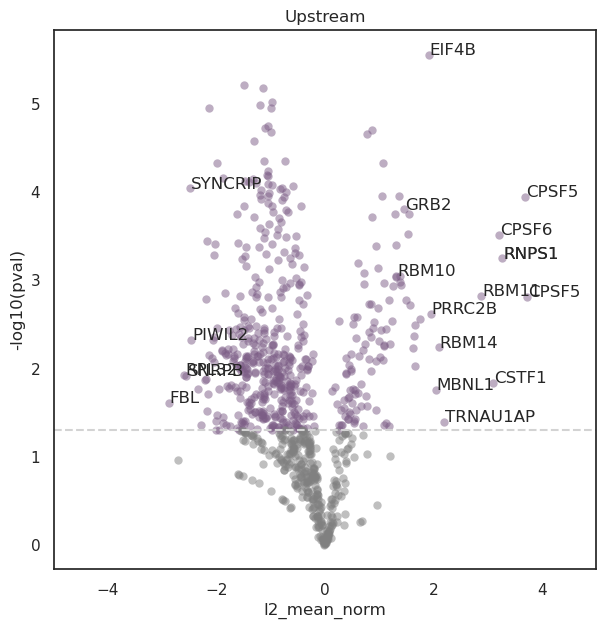

In [69]:
sns.set(rc={'figure.figsize':(7,7)}, style='white')
aur_plot = sns.scatterplot(data=aur[aur['pvalue']<0.05], x='l2_mean_norm', y='-log10(pval)', linewidth=0, alpha=0.5, color='#7C5D86')
sns.scatterplot(data=aur[aur['pvalue']>=0.05], x='l2_mean_norm', y='-log10(pval)', linewidth=0, alpha=0.5, color='grey')
for i, point in aur_top_activaor_10.iterrows():
    aur_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))
for i, point in aur_top_inhibitor_10.iterrows():
    aur_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))
for i, point in aur_sig.iterrows():
    if str(point['index']) in ['GRB2', 'RMB22' 'EIF4B', 'RBM10', 'RNPS1']:
        aur_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))
plt.title('Upstream')
plt.axhline(y=-np.log10(0.05), color='lightgrey', linestyle='dashed')
plt.xlim(-5, 5)
# plt.savefig('upstream_all_screen_results.png')
# plt.savefig('upstream_all_screen_results.svg')
# plt.savefig('upstream_all_screen_results.jpg')

In [70]:
adr = annotated_downstream_results.copy()
adr.shape

(875, 21)

In [71]:
adr=adr.dropna(subset=['index'])
adr = adr.sort_values('pvalue', ascending=True).drop_duplicates(subset=['aa_sequence'])

In [72]:
adr.columns

Index(['index', 'rep1', 'rep2', 'rep3', 'mean', 'std', 'pvalue', 'stars',
       'well_id', 'RBPmean-NEGmean', '|RBPmean-NEGmean|', 'mean_normalized',
       'reporter', 'Symbol', 'Plate Location', 'Gene ID', 'Size', 'Accession',
       'nt_sequence', 'aa_sequence', 'Effect'],
      dtype='object')

In [73]:
adr['l2_mean_norm'] = np.log2(adr['mean_normalized'])

In [74]:
adr['-log10(pval)'] = -np.log10(adr['pvalue'])

In [75]:
adr_sig = adr[adr['pvalue'] < 0.05]

In [76]:
adr_top_activaor_10 = adr_sig.sort_values(by=['mean_normalized', '-log10(pval)'], ascending=[False, False]).head(11)
adr_top_inhibitor_10 = adr_sig.sort_values(by=['mean_normalized', '-log10(pval)'], ascending=[False, False]).tail(5)

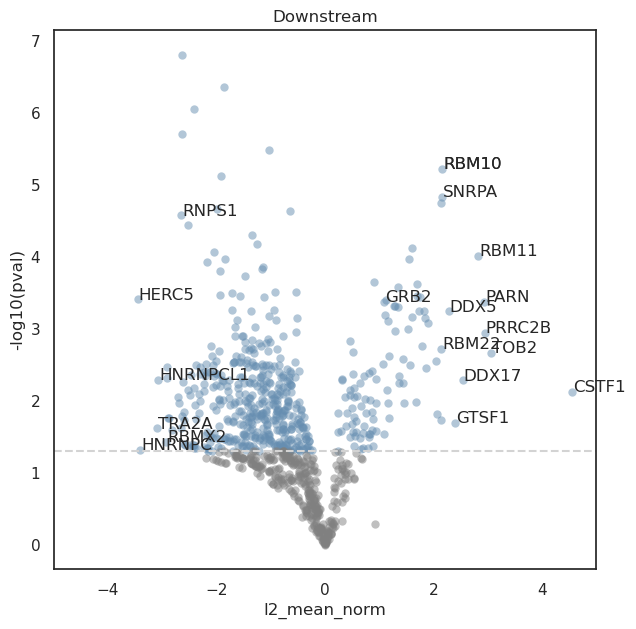

In [78]:
sns.set(rc={'figure.figsize':(7,7)}, style='white')
adr_plot = sns.scatterplot(data=adr[adr['pvalue']<0.05], x='l2_mean_norm', y='-log10(pval)', linewidth=0, alpha=0.5, color='#668EB1')
sns.scatterplot(data=adr[adr['pvalue']>=0.05], x='l2_mean_norm', y='-log10(pval)', linewidth=0, alpha=0.5, color='grey')
for i, point in adr_top_activaor_10.iterrows():
    adr_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))
for i, point in adr_top_inhibitor_10.iterrows():
    adr_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))

for i, point in adr_sig.iterrows():
    if str(point['index']) in ['GRB2', 'RMB22' 'EIF4B', 'RBM10', 'RNPS1']:
        adr_plot.text(point['l2_mean_norm']+.02, point['-log10(pval)'], str(point['index']))
plt.title('Downstream')
plt.axhline(y=-np.log10(0.05), color='lightgrey', linestyle='dashed')
plt.xlim(-5, 5)
# plt.savefig('downstream_all_screen_results.png')
# plt.savefig('downstream_all_screen_results.svg')
# plt.savefig('downstream_all_screen_results.jpg')


In [63]:
aur_sig['unique_identifier'] = aur_sig.apply(lambda x: f"{x['index']}_{x['Plate Location']}", axis=1)
adr_sig['unique_identifier'] = adr_sig.apply(lambda x: f"{x['index']}_{x['Plate Location']}", axis=1)

/tmp/ipykernel_1430403/2019362984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aur_sig['unique_identifier'] = aur_sig.apply(lambda x: f"{x['index']}_{x['Plate Location']}", axis=1)
/tmp/ipykernel_1430403/2019362984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adr_sig['unique_identifier'] = adr_sig.apply(lambda x: f"{x['index']}_{x['Plate Location']}", axis=1)


In [64]:
adr_sig.shape

(525, 24)

In [65]:
aur_sig_activator = aur_sig[aur_sig['Effect'] =='positive']
aur_sig_inhibitor = aur_sig[aur_sig['Effect'] =='negative']
print('Upstream Activator', aur_sig_activator.shape)
print('Upstream Inhibitor', aur_sig_inhibitor.shape)

Upstream Activator (112, 24)
Upstream Inhibitor (415, 24)


In [66]:
adr_sig_activator = adr_sig[adr_sig['Effect'] =='positive']
adr_sig_inhibitor = adr_sig[adr_sig['Effect'] =='negative']
print('Downstream Activator', adr_sig_activator.shape)
print('Downstream Inhibitor', adr_sig_inhibitor.shape)

Downstream Activator (101, 24)
Downstream Inhibitor (424, 24)


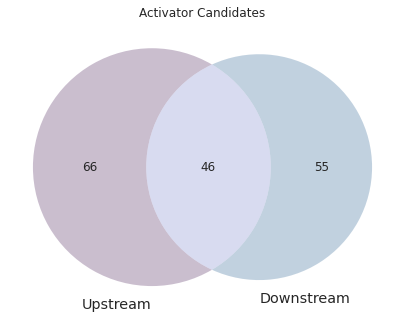

In [67]:
from matplotlib_venn import venn2

set1 = set(aur_sig_activator['unique_identifier'])
set2 = set(adr_sig_activator['unique_identifier'])


venn2([set1, set2], ('Upstream', 'Downstream'), set_colors=['#7C5D86','#668EB1'])
plt.title('Activator Candidates')
# plt.savefig('activator_venn.png')
# plt.savefig('activator_venn.svg')
# plt.savefig('activator_venn.jpg')
plt.show()


In [68]:
up_act_unique = set(aur_sig_activator['unique_identifier']) - set(adr_sig_activator['unique_identifier'])
down_act_unique = set(adr_sig_activator['unique_identifier']) - set(aur_sig_activator['unique_identifier'])
act_common = set(adr_sig_activator['unique_identifier']).intersection(set(aur_sig_activator['unique_identifier']))

In [83]:
def make_barplot(df):
    test_df = df.copy()
    test_df['index'] = [f"{idx}_{i}" for i, idx in enumerate(test_df['index'])]
    # test_df_melted = test_df.melt(id_vars=['index'], var_name='replicate', value_name='value')
    sns.barplot(data=test_df, y='index', x='mean_normalized')


Text(0.5, 1.0, 'Activator Downstream Unique')

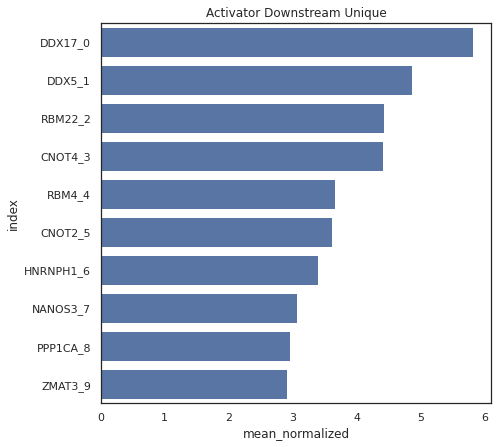

In [91]:
make_barplot(adr_sig_activator[adr_sig_activator['unique_identifier'].isin(down_act_unique)].sort_values(by='mean_normalized', ascending=False).drop_duplicates(subset='index')[['index', 'mean_normalized']].head(10))
plt.title('Activator Downstream Unique')

Text(0.5, 1.0, 'Activator Upstream Unique')

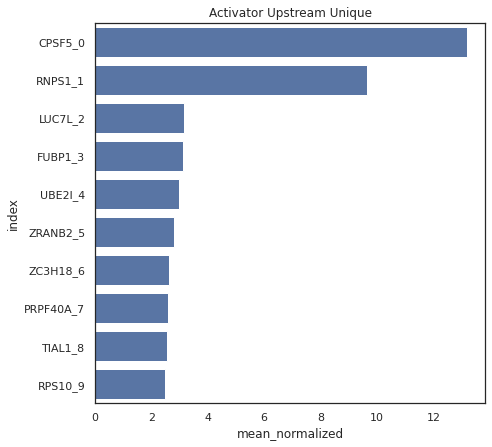

In [92]:
make_barplot(aur_sig_activator[aur_sig_activator['unique_identifier'].isin(up_act_unique)].sort_values(by='mean_normalized', ascending=False).drop_duplicates(subset='index')[['index', 'mean_normalized']].head(10))
plt.title('Activator Upstream Unique')

In [100]:
down_act_common_df = adr_sig_activator[adr_sig_activator['unique_identifier'].isin(act_common)].sort_values(by='mean_normalized', ascending=False)[['unique_identifier', 'mean_normalized']].set_index('unique_identifier')
up_act_common_df = aur_sig_activator[aur_sig_activator['unique_identifier'].isin(act_common)].sort_values(by='mean_normalized', ascending=False)[['unique_identifier', 'mean_normalized']].set_index('unique_identifier')
down_act_common_df['reporter']= 'downstream'
up_act_common_df['reporter']= 'upstream'
merged = down_act_common_df.merge(up_act_common_df, on='unique_identifier').sort_values(by=['mean_normalized_x', 'mean_normalized_y'], ascending=[False, False]).head(10)
df_melted = df.melt(id_vars=['unique_identifier'], var_name='variable', value_name='value')


,mean_normalized_x,reporter_x,mean_normalized_y,reporter_y
unique_identifier,,,,
CSTF1_DNASU001.H05,23.645857,downstream,8.562570,upstream
TOB2_DNASU001.F07,8.372359,downstream,1.764427,upstream
PRRC2B_Missing_Wells.B01,7.719743,downstream,3.870599,upstream
PARN_GYRBP007.C07,7.692181,downstream,1.424491,upstream
RBM11_GYRBP003.H09,7.076346,downstream,7.400483,upstream
GTSF1_GYRBP002.B06,5.273833,downstream,1.993745,upstream
RBM10_GYRBP002.D01,4.475657,downstream,2.487073,upstream
SNRPA_GYRBP003.G10,4.446545,downstream,1.636338,upstream
RBM14_GYRBP001.G07,4.397837,downstream,4.287937,upstream


In [307]:
adr_sig_activator[adr_sig_activator['unique_identifier'].isin(down_act_unique)].sort_values(by='mean_normalized', ascending=False).head(10)[['index', 'rep1', 'rep2', 'rep3']]

,index,rep1,rep2,rep3
610,DDX17,5.430838,6.333449,6.960575
779,DDX5,2.944869,3.086957,3.398604
738,RBM22,3.279349,3.275888,3.260417
694,CNOT4,4.103397,4.159778,4.228646
654,RBM4,3.984477,4.466918,4.869085
727,CNOT2,3.851311,4.193459,3.886010
692,HNRNPH1,3.228375,3.224230,3.171519
168,NANOS3,3.503933,3.760746,3.168825
800,PPP1CA,1.852506,1.969009,2.014686
264,ZMAT3,3.906110,4.209584,4.478570


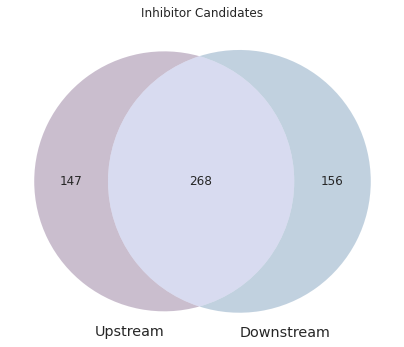

In [243]:
set1 = set(aur_sig_inhibitor['unique_identifier'])
set2 = set(adr_sig_inhibitor['unique_identifier'])


venn2([set1, set2], ('Upstream', 'Downstream'), set_colors=['#7C5D86','#668EB1'])
plt.title('Inhibitor Candidates')
plt.savefig('inhibitor_venn.png')
plt.savefig('inhibitor_venn.svg')
plt.savefig('inhibitor_venn.jpg')
plt.show()

In [245]:
annotated_upstream_results.columns

Index(['index', 'rep1', 'rep2', 'rep3', 'mean', 'std', 'pvalue', 'stars',
       'well_id', 'RBPmean-NEGmean', '|RBPmean-NEGmean|', 'mean_normalized',
       'reporter', 'Symbol', 'Plate Location', 'Gene ID', 'Size', 'Accession',
       'nt_sequence', 'aa_sequence', 'Effect'],
      dtype='object')